https://facebook.github.io/prophet/docs/quick_start.html

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column must contain a date or datetime (either is fine). The y column must be numeric, and represents the measurement we wish to forecast.

As an example, let’s look at a time series of daily page views for the Wikipedia page for Peyton Manning. We scraped this data using the Wikipediatrend package in R. Peyton Manning provides a nice example because it illustrates some of Prophet’s features, like multiple seasonality, changing growth rates, and the ability to model special days (such as Manning’s playoff and superbowl appearances).

In [5]:
# Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
%matplotlib inline

## Quickstart

In [2]:
df = pd.read_csv('/Users/robincole/Documents/Github/prophet/examples/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


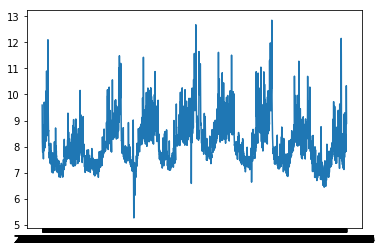

In [12]:
plt.plot(df['ds'], df['y'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a728f98>]], dtype=object)

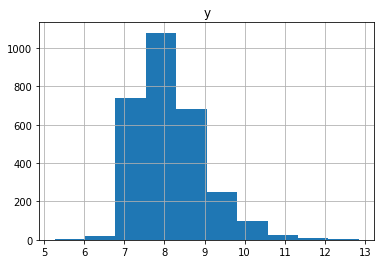

In [6]:
df.hist()

In [7]:
df.shape

(2905, 2)

In [8]:
% time
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.209074,7.514589,8.923520
3266,2017-01-16,8.534139,7.833081,9.220889
3267,2017-01-17,8.321541,7.565393,9.020955
3268,2017-01-18,8.154138,7.431420,8.857782
3269,2017-01-19,8.166091,7.404350,8.879903


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

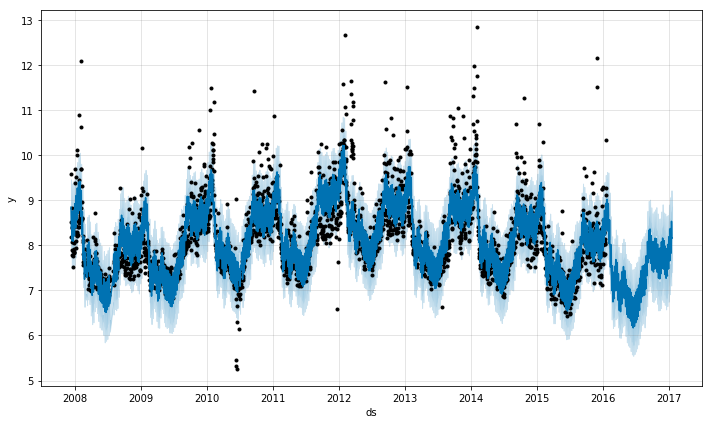

In [11]:
m.plot(forecast);

If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

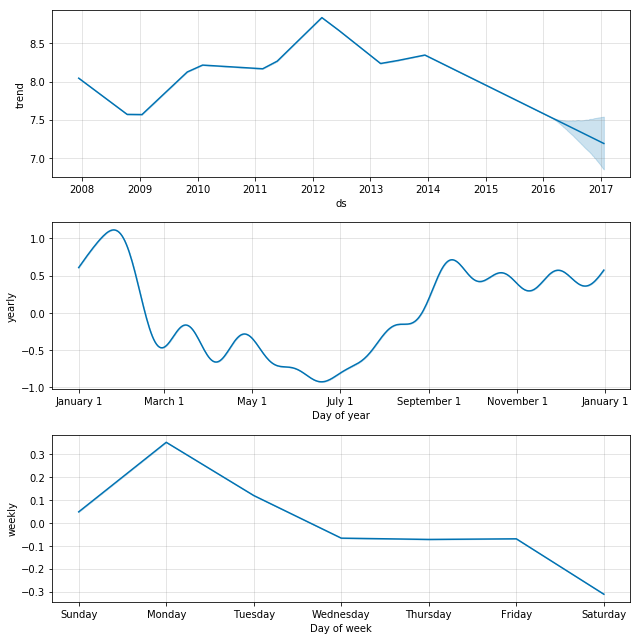

In [13]:
m.plot_components(forecast);

## Sub daily data

https://facebook.github.io/prophet/docs/non-daily_data.html
    
Prophet can make forecasts for time series with sub-daily observations by passing in a dataframe with timestamps in the ds column. When sub-daily data are used, daily seasonality will automatically be fit. Here we fit Prophet to data with 5-minute resolution (daily temperatures at Yosemite):

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


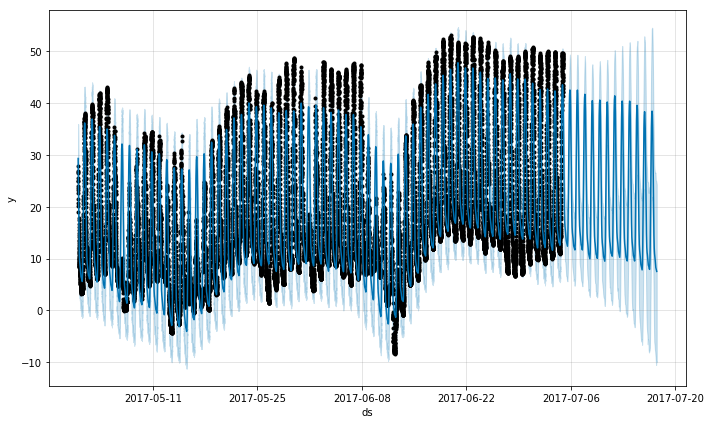

In [15]:
df = pd.read_csv('/Users/robincole/Documents/Github/prophet/examples/example_yosemite_temps.csv')
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
m.plot(fcst);

In [17]:
df.head()

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8
3,2017-05-01 00:15:00,26.5
4,2017-05-01 00:20:00,25.6


In [21]:
df['ds'][0]

'2017-05-01 00:00:00'

In [23]:
type(df['ds'][0])

str